In [75]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import scipy.stats as stats
%matplotlib inline

In [76]:
#原始数据
df_origin = pd.read_csv('./RPT_SR_NETSALES.csv')

# Data Understanding

In [77]:
df_origin.head()

,DEALER_CODE,SALES_MANAGER_CODE,SALES_MANAGER_NAME,INVESTMENT_SPECIALIST_CODE,INVESTMENT_SPECIALIST_NAME,TRADING_AGENT_STATUS,TRADING_STATUS,ACCOUNT_NUMBER,PRIMARY_OWNER_NAME,ACCOUNT_TYPE,...,CAD_EQUIVALENT,FX_RATE,TRADE_DATE,ENTRY_DATE,SETTLEMENT_DATE,REVERSED_DATE,PROCESSING_TRANSIT,TRANSFER_COMPANY,DOMICILE_TRANSIT,CREATE_DATE
0,7689,21765,Patricia(Trish) Vale,22395,Jill Diemer,Active,Unrestricted,70018110,JOAN WOODWARD,RRS,...,5369.73,null,28-MAY-18,29-MAY-18,28-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
1,7689,21765,Patricia(Trish) Vale,22395,Jill Diemer,Active,Unrestricted,70018110,JOAN WOODWARD,RRS,...,5125.66,null,28-MAY-18,29-MAY-18,28-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
2,7689,21765,Patricia(Trish) Vale,22395,Jill Diemer,Active,Unrestricted,70381253,PATRICIA CHISHOLM,RRS,...,9024.41,null,28-MAY-18,29-MAY-18,28-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
3,7689,21765,Patricia(Trish) Vale,22395,Jill Diemer,Active,Unrestricted,70018860,JOAN WOODWARD,TFS,...,19982.81,null,28-MAY-18,29-MAY-18,28-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
4,7689,20862,Parnell Sebelius,21106,Stechley James,Active,Unrestricted,29974662,DUSTIN CARTER,RRS,...,100.00,null,25-MAY-18,29-MAY-18,29-MAY-18,null,85142,null,10199,2018-06-08 00:00


In [78]:
df_origin.drop(['SALES_MANAGER_NAME', 'INVESTMENT_SPECIALIST_NAME', 'TRADE_DATE', 
               'SETTLEMENT_DATE'], axis=1, inplace=True)
df_origin.head()

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,TRADING_AGENT_STATUS,TRADING_STATUS,ACCOUNT_NUMBER,PRIMARY_OWNER_NAME,ACCOUNT_TYPE,PLAN_PRODUCT_DESCRIPTION,OWNERSHIP,...,GROSS_AMOUNT,CURRENCY,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,TRANSFER_COMPANY,DOMICILE_TRANSIT,CREATE_DATE
0,7689,21765,22395,Active,Unrestricted,70018110,JOAN WOODWARD,RRS,RRSP,IND,...,5369.73,CAD,5369.73,null,29-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
1,7689,21765,22395,Active,Unrestricted,70018110,JOAN WOODWARD,RRS,RRSP,IND,...,5125.66,CAD,5125.66,null,29-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
2,7689,21765,22395,Active,Unrestricted,70381253,PATRICIA CHISHOLM,RRS,RRSP,IND,...,9024.41,CAD,9024.41,null,29-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
3,7689,21765,22395,Active,Unrestricted,70018860,JOAN WOODWARD,TFS,TFSA,IND,...,19982.81,CAD,19982.81,null,29-MAY-18,null,85142,Qtrade Asset Management Inc.,40600,2018-06-08 00:00
4,7689,20862,21106,Active,Unrestricted,29974662,DUSTIN CARTER,RRS,RRSP,IND,...,100.00,CAD,100.00,null,29-MAY-18,null,85142,null,10199,2018-06-08 00:00


In [79]:
import pandasql as pdsql

def to_numeric(df, old_column, new_column):
    sql1 = ("SELECT DISTINCT %s FROM %s ORDER BY %s <> 'null' AND %s <> 'False' AND %s <> 'Inactive';" 
            %(old_column, df, old_column, old_column, old_column))
    #print(sql1)
    df_tmp1 = pdsql.sqldf(sql1)
    df_tmp1[new_column] = np.arange(len(df_tmp1))
    #print(df_tmp1)
    sql2 = 'SELECT df1.*, df2.%s FROM %s df1 \
        LEFT JOIN df_tmp1 df2 ON df1.%s=df2.%s;' %(new_column, df, old_column, old_column)
    df_tmp2 = pdsql.sqldf(sql2)
    return df_tmp1, df_tmp2

df_Type, dfA = to_numeric('df_origin', 'ACCOUNT_TYPE', 'Type')
#TRADING_AGENT_STATUS, TRADING_STATUS, TRANSFER_COMPANY
df_AgentStatus, dfB = to_numeric('dfA', 'TRADING_AGENT_STATUS', 'AgentStatus')
df_Status, dfC = to_numeric('dfB', 'TRADING_STATUS', 'Status')
df_Company, dfD = to_numeric('dfC', 'TRANSFER_COMPANY', 'Company')
df_Product, dfE = to_numeric('dfD', 'PLAN_PRODUCT_DESCRIPTION', 'Product')
df_Ownership, dfF = to_numeric('dfE', 'OWNERSHIP', 'OwnershipR')
df_Category, dfG = to_numeric('dfF', 'CATEGORY', 'CategoryR')
df_Investment, dfH = to_numeric('dfG', 'INVESTMENT_DESCRIPTION', 'Investment')
df_Transaction, dfI = to_numeric('dfH', 'TRANSACTION_DESCRIPTION', 'TransactionR')
df_Currency, dfJ = to_numeric('dfI', 'CURRENCY', 'CurrencyR')
df_Code, dfK = to_numeric('dfJ', 'INVESTMENT_CODE', 'Code')

df_origin = dfK
df_origin.drop(['ACCOUNT_TYPE', 'TRADING_AGENT_STATUS', 'TRADING_STATUS', 'TRANSFER_COMPANY', 
               'PLAN_PRODUCT_DESCRIPTION', 'OWNERSHIP', 'CATEGORY', 'INVESTMENT_DESCRIPTION', 
                'TRANSACTION_DESCRIPTION', 'CURRENCY', 'INVESTMENT_CODE', 
               'MFR_START_DATE', 'CREATE_DATE', 
               'ACCOUNT_NUMBER', 'CID_NUMBER', 'GROSS_AMOUNT'], axis=1, inplace=True)
df_origin.head()

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,AgentStatus,Status,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code
0,7689,21765,22395,JOAN WOODWARD,5369.73,null,29-MAY-18,null,85142,40600,...,0,0,1,0,0,0,0,0,0,0
1,7689,21765,22395,JOAN WOODWARD,5125.66,null,29-MAY-18,null,85142,40600,...,0,0,1,0,0,0,1,0,0,1
2,7689,21765,22395,PATRICIA CHISHOLM,9024.41,null,29-MAY-18,null,85142,40600,...,0,0,1,0,0,0,2,0,0,2
3,7689,21765,22395,JOAN WOODWARD,19982.81,null,29-MAY-18,null,85142,40600,...,0,0,1,1,0,0,3,0,0,3
4,7689,20862,21106,DUSTIN CARTER,100.00,null,29-MAY-18,null,85142,10199,...,0,0,0,0,0,0,4,1,0,4


In [80]:
df = df_origin
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41433 entries, 0 to 41432
Data columns (total 21 columns):
DEALER_CODE                   41433 non-null int64
SALES_MANAGER_CODE            41433 non-null int64
INVESTMENT_SPECIALIST_CODE    41433 non-null object
PRIMARY_OWNER_NAME            41433 non-null object
CAD_EQUIVALENT                41433 non-null float64
FX_RATE                       41433 non-null object
ENTRY_DATE                    41433 non-null object
REVERSED_DATE                 41433 non-null object
PROCESSING_TRANSIT            41433 non-null int64
DOMICILE_TRANSIT              41433 non-null int64
Type                          41433 non-null int64
AgentStatus                   41433 non-null int64
Status                        41433 non-null int64
Company                       41433 non-null int64
Product                       41433 non-null int64
OwnershipR                    41433 non-null int64
CategoryR                     41433 non-null int64
Investment       

In [81]:
df.describe()

,DEALER_CODE,SALES_MANAGER_CODE,CAD_EQUIVALENT,PROCESSING_TRANSIT,DOMICILE_TRANSIT,Type,AgentStatus,Status,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code
count,41433.0,41433.000000,4.143300e+04,41433.000000,41433.000000,41433.000000,41433.0,41433.000000,41433.000000,41433.000000,41433.000000,41433.000000,41433.000000,41433.000000,41433.000000,41433.000000
mean,7689.0,62274.199961,1.006116e+04,82705.732267,46934.891101,2.002486,0.0,0.036662,0.441049,2.002486,0.374581,0.916443,46.278039,1.793546,0.004851,53.878696
std,0.0,39358.260995,5.041322e+04,11831.623678,29096.246195,2.455880,0.0,0.187932,4.961500,2.455880,1.001791,1.035953,91.769112,1.053479,0.069482,108.320214
min,7689.0,14199.000000,1.000000e-02,26.000000,26.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7689.0,21115.000000,1.000000e+02,85142.000000,21196.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,1.000000,0.000000,14.000000
50%,7689.0,96715.000000,2.000000e+02,85142.000000,50229.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,15.000000,2.000000,0.000000,16.000000
75%,7689.0,99447.000000,1.859380e+03,85142.000000,70490.000000,3.000000,0.0,0.000000,0.000000,3.000000,0.000000,2.000000,30.000000,2.000000,0.000000,38.000000
max,7689.0,99690.000000,4.026795e+06,98616.000000,98616.000000,17.000000,0.0,1.000000,114.000000,17.000000,9.000000,6.000000,803.000000,10.000000,1.000000,911.000000


In [82]:
#转换为 日期时间 类型
import datetime
format = '%d-%b-%y' #'%b %d %Y %I:%M%p' == 'Jun 1 2005 1:33PM'

df1 = df.copy()
df1['Entry01'] = df.apply(
    lambda row: datetime.datetime.strptime(
        (row.ENTRY_DATE)[0:4] + ((row.ENTRY_DATE)[4:]).lower(), format), axis=1)
#df1['Entry'] = df1.apply(lambda row: int(str(row.Entry01).replace('-', '')[0:8]), axis=1)
#df1[['Entry']] = df1[['Entry']].astype(datetime) ???
df1['Entry'] = pd.to_datetime(df1['Entry01']) #转换为 日期时间 类型
df1.drop('Entry01', axis=1, inplace=True)
df1['CAD'] = df1.apply(lambda row: float(str(row.CAD_EQUIVALENT)), axis=1)
df1.head()

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code,Entry,CAD
0,7689,21765,22395,JOAN WOODWARD,5369.73,null,29-MAY-18,null,85142,40600,...,1,0,0,0,0,0,0,0,2018-05-29,5369.73
1,7689,21765,22395,JOAN WOODWARD,5125.66,null,29-MAY-18,null,85142,40600,...,1,0,0,0,1,0,0,1,2018-05-29,5125.66
2,7689,21765,22395,PATRICIA CHISHOLM,9024.41,null,29-MAY-18,null,85142,40600,...,1,0,0,0,2,0,0,2,2018-05-29,9024.41
3,7689,21765,22395,JOAN WOODWARD,19982.81,null,29-MAY-18,null,85142,40600,...,1,1,0,0,3,0,0,3,2018-05-29,19982.81
4,7689,20862,21106,DUSTIN CARTER,100.00,null,29-MAY-18,null,85142,10199,...,0,0,0,0,4,1,0,4,2018-05-29,100.00


##  总体

In [83]:
#按 日期 进行统计
#!pip install pandasql
import pandasql as pdsql
sql = ("SELECT Entry, count(*) Count, sum(CAD) AMT FROM df1 GROUP BY Entry ORDER BY Entry;")
#pysql = lambda q: pdsql.sqldf(q, globals())
#df = pysql(sql)
df2 = pdsql.sqldf(sql)
df2['Entry'] = pd.to_datetime(df2['Entry'])
df2.head()

,Entry,Count,AMT
0,2018-05-03,1,32828.47
1,2018-05-05,1,7019.20
2,2018-05-12,1,5550.23
3,2018-05-14,1,84944.91
4,2018-05-16,2,34884.72


In [84]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 3 columns):
Entry    39 non-null datetime64[ns]
Count    39 non-null int64
AMT      39 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1016.0 bytes


In [85]:
df2.describe()

,Count,AMT
count,39.000000,3.900000e+01
mean,1062.384615,1.068882e+07
std,1056.643559,8.165667e+06
min,1.000000,2.876890e+03
25%,55.000000,7.257662e+05
50%,1043.000000,1.320326e+07
75%,1376.500000,1.684068e+07
max,4869.000000,2.519998e+07


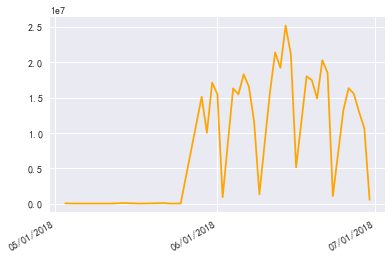

In [86]:
import matplotlib.dates as mdates
#plt.figure(figsize=(15,4))

plt.plot(df2.Entry, df2.AMT, color='orange')

# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

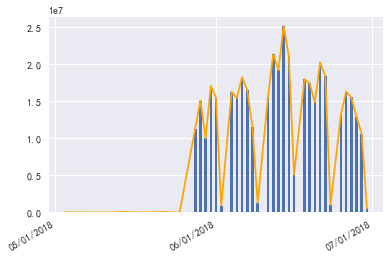

In [87]:
df5 = df2.copy()

#ax = plt.subplot(111)
df5.set_index('Entry', inplace=True)

plt.bar(df5.index, df5.AMT, width=0.5)
#ax.xaxis_date()
plt.plot(df2.Entry, df2.AMT, color='orange')

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

<Container object of 39 artists>

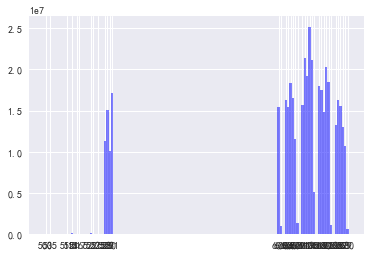

In [88]:
#不好, 日期中断了
date_index = (df2.Entry.apply(lambda row: int((row).strftime('%m%d'))))
plt.xticks(df2.Entry.apply(lambda row: int((row).strftime('%m%d'))))
plt.bar((df2.Entry.apply(lambda row: int((row).strftime('%m%d')))), 
        df2.AMT, width=1, alpha=0.5, color='b', label='AMT')

In [89]:
df5.drop('Count', axis=1, inplace=True)
df5.head()
#ser1 = pd.Series(df5.AMT)
#ser1

,AMT
Entry,
2018-05-03,32828.47
2018-05-05,7019.20
2018-05-12,5550.23
2018-05-14,84944.91
2018-05-16,34884.72


[1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 1. 2. 1. 1. 1. 2. 1.
 2. 0. 2. 1. 2. 1. 1. 1. 2. 1. 1. 1. 2. 1. 2.]


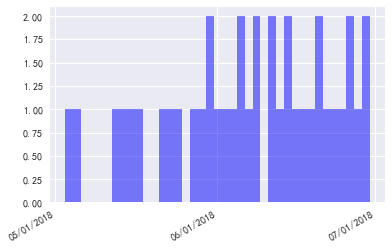

In [90]:
#不对, hist 类似 sns.countplot
n, bins, patches = plt.hist(x=df5.index, data=df5.AMT, bins=39, facecolor='blue', alpha=0.5)
#plt.figure(figsize=(15,4))
print(n)
#plt.hist(df5.AMT, bins=39)
#plt.ylim(0, 20)

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

#sns.countplot(x=df5.index, data=df5.AMT, alpha=0.5)

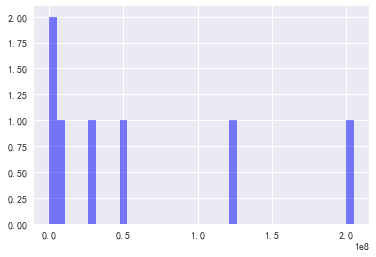

In [91]:
######################################################
sql = ("SELECT CategoryR, count(*) Count, sum(CAD) AMT FROM df1 GROUP BY CategoryR ORDER BY Entry;")
#pysql = lambda q: pdsql.sqldf(q, globals())
#df = pysql(sql)
df_tmp = pdsql.sqldf(sql)
df_tmp
n, bins, patches = plt.hist(x=df_tmp.AMT, bins=39, facecolor='blue', alpha=0.5)

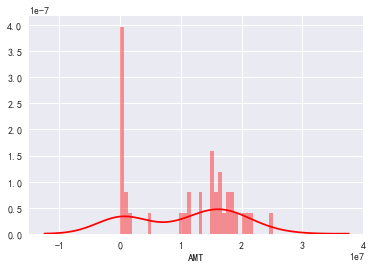

In [92]:
#
#print(df5)
sns.distplot(df5.AMT, bins=39, color='red')
#sns.countplot(df5.AMT)

   CategoryR  Count           AMT
0          5     40  1.237192e+06
1          0  22559  2.052626e+08
2          2  16580  1.246127e+08
3          4     32  9.116710e+06
4          1   1108  2.885478e+07
5          6     11  1.155875e+05
6          3   1103  4.766431e+07


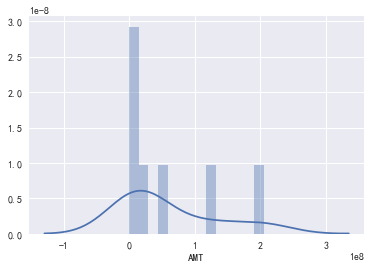

In [93]:
######################################################
sql = ("SELECT CategoryR, count(*) Count, sum(CAD) AMT FROM df1 GROUP BY CategoryR ORDER BY Entry;")
#pysql = lambda q: pdsql.sqldf(q, globals())
#df = pysql(sql)
df_tmp = pdsql.sqldf(sql)
print(df_tmp)
sns.distplot(a=df_tmp.AMT, bins=14)

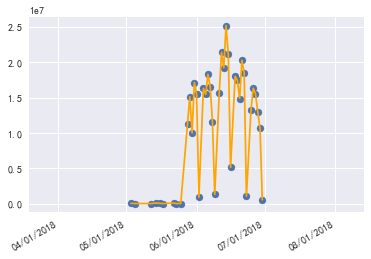

In [94]:
plt.scatter(df5.index, df5.AMT)
plt.plot(df2.Entry, df2.AMT, color='orange')

plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

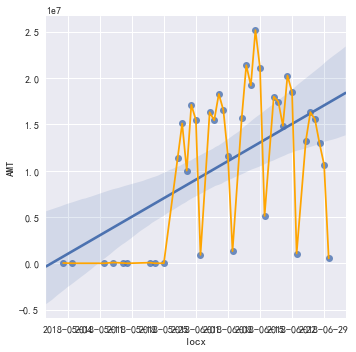

In [95]:
#a = matplotlib.dates.date2num(df5.index.date())
df2['locx'] = (df2.Entry.apply(lambda row: matplotlib.dates.date2num(row.date())))
df2
sns.lmplot(data=df2, x='locx', y='AMT')
plt.plot(df2.Entry, df2.AMT, color='orange')

In [96]:
np.mean(df2.AMT)

10688818.159999998

In [97]:
np.median(df2.AMT)

13203259.449999994

In [98]:
stats.mode(df2.AMT)

ModeResult(mode=array([2876.89]), count=array([1]))

In [99]:
np.min(df2.AMT)

2876.89

In [100]:
np.max(df2.AMT)

25199977.68

In [101]:
np.max(df2.AMT) - np.min(df2.AMT) #range

25197100.79

In [102]:
np.var(df2.AMT)

64968415063480.32

In [103]:
np.std(df2.AMT)

8060298.695673773

In [104]:
#Standard Error
np.std(df2.AMT) / np.sqrt(len(df2))

1290680.7492557932

In [105]:
stats.skew(df2.AMT)

-0.23311824643238876

In [106]:
stats.kurtosis(df2.AMT)

-1.4430069975646955

In [107]:
import numpy as np
#!pip install stats
import stats as sts

scores = df2.AMT
df3 = pd.DataFrame(scores);

#集中趋势的度量
print('求和：        ', np.sum(scores))
print('个数：        ', len(scores))
print('平均值:       ', np.mean(scores))
print('中位数:       ', np.median(scores))
print('众数:         ', stats.mode(scores)) # sts.mode(scores))
print('1.上四分位数: ', stats.mstats.mquantiles(scores, 0.25, alphap=0.5, betap=0.5))
print('2.上四分位数: ', df3.quantile(.25));
print('3.上四分位数: ', sts.quantile(scores, p=0.25))
print('1.下四分位数: ', stats.mstats.mquantiles(scores, 0.75, alphap=0.5, betap=0.5))
print('2.下四分位数: ', df3.quantile(.75));
print('3.下四分位数: ', sts.quantile(scores, p=0.75))
#离散趋势的度量
print('最大值:       ', np.max(scores))
print('最小值:       ', np.min(scores))
print('极差:         ', np.max(scores)-np.min(scores))
print('四分位差:     ', sts.quantile(scores, p=0.75) - sts.quantile(scores, p=0.25))
print('标准差:       ', np.std(scores))
print('方差:         ', np.var(scores))
print('离散系数:     ', np.std(scores) / np.mean(scores))
#偏度与峰度的度量
print('1.偏度:       ', stats.skew(scores))
print('2.偏度:       ', df3.skew());
print('3.偏度:       ', sts.skewness(scores))
print('1.峰度:       ', stats.kurtosis(scores))
print('2.峰度:       ', df3.kurtosis());
print('3.峰度:       ', sts.kurtosis(scores))

求和：         416863908.23999995
个数：         39
平均值:        10688818.159999998
中位数:        13203259.449999994
众数:          ModeResult(mode=array([2876.89]), count=array([1]))
1.上四分位数:  [634258.8]
2.上四分位数:  AMT    725766.17
Name: 0.25, dtype: float64
3.上四分位数:  542751.4299999999
1.下四分位数:  [16984927.13]
2.下四分位数:  AMT    16840675.02
Name: 0.75, dtype: float64
3.下四分位数:  17129179.24
最大值:        25199977.68
最小值:        2876.89
极差:          25197100.79
四分位差:      16586427.809999999
标准差:        8060298.695673773
方差:          64968415063480.32
离散系数:      0.7540869883854189
1.偏度:        -0.23311824643238876
2.偏度:        AMT   -0.242549
dtype: float64
3.偏度:        -0.22420988295571861
1.峰度:        -1.4430069975646955
2.峰度:        AMT   -1.475503
dtype: float64
3.峰度:        -1.5218291285229597


## 个人

In [108]:
#!pip install pandasql
import pandasql as pdsql
sql = ("SELECT PRIMARY_OWNER_NAME, count(*) CT, sum(CAD_EQUIVALENT) AMT FROM df GROUP BY PRIMARY_OWNER_NAME ORDER BY CT DESC;")
#pysql = lambda q: pdsql.sqldf(q, globals())
#df = pysql(sql)
df7 = pdsql.sqldf(sql)
df7.head()

,PRIMARY_OWNER_NAME,CT,AMT
0,SAHAR AL-MASRY,88,6363.75
1,JOHANNE LEVAC,68,6686.12
2,TREVOR DOUGLAS,54,5552.00
3,CHRISTOPHER WOOD,48,2400.00
4,DIANE WALDOCK,46,619085.23


In [109]:
df8 = df[df['PRIMARY_OWNER_NAME']=='TREVOR DOUGLAS']
df8.head() #54 records for one PRIMARY_OWNER_NAME

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,AgentStatus,Status,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code
528,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,0,0,4,1,0,12,1,0,12
529,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,0,0,4,1,0,10,1,0,10
534,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,0,0,12,1,0,12
536,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,0,0,65,1,0,69
946,7689,96715,99205,TREVOR DOUGLAS,100.0,null,29-MAY-18,null,85142,20362,...,0,0,0,1,0,0,5,1,0,5


In [110]:
#转换为 日期时间 类型
import datetime
format = '%d-%b-%y' #'%b %d %Y %I:%M%p' == 'Jun 1 2005 1:33PM'

df9 = df8.copy()
df9['Entry01'] = df8.apply(
    lambda row: datetime.datetime.strptime(
        (row.ENTRY_DATE)[0:4] + ((row.ENTRY_DATE)[4:]).lower(), format), axis=1)
#df9['Entry'] = df9.apply(lambda row: int(str(row.Entry01).replace('-', '')[0:8]), axis=1)
#df9[['Entry']] = df9[['Entry']].astype(datetime) ???
df9['Entry'] = pd.to_datetime(df9['Entry01']) #转换为 日期时间 类型
df9.drop('Entry01', axis=1, inplace=True)
df9['AMT'] = df9.apply(lambda row: float(str(row.CAD_EQUIVALENT)), axis=1)

#df9.set_index('Entry', inplace=True)
df9['Series'] = range(0, len(df9))
df9.set_index('Series', inplace=True)
df9

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code,Entry,AMT
Series,,,,,,,,,,,,,,,,,,,,,
0,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,12,1,0,12,2018-05-29,110.0
1,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,10,1,0,10,2018-05-29,110.0
2,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,12,1,0,12,2018-05-29,67.0
3,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,65,1,0,69,2018-05-29,67.0
4,7689,96715,99205,TREVOR DOUGLAS,100.0,null,29-MAY-18,null,85142,20362,...,0,1,0,0,5,1,0,5,2018-05-29,100.0
5,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
6,7689,96715,99205,TREVOR DOUGLAS,100.0,null,01-JUN-18,null,85142,20362,...,0,1,0,2,14,2,0,14,2018-06-01,100.0
7,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
8,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0


In [111]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 53
Data columns (total 23 columns):
DEALER_CODE                   54 non-null int64
SALES_MANAGER_CODE            54 non-null int64
INVESTMENT_SPECIALIST_CODE    54 non-null object
PRIMARY_OWNER_NAME            54 non-null object
CAD_EQUIVALENT                54 non-null float64
FX_RATE                       54 non-null object
ENTRY_DATE                    54 non-null object
REVERSED_DATE                 54 non-null object
PROCESSING_TRANSIT            54 non-null int64
DOMICILE_TRANSIT              54 non-null int64
Type                          54 non-null int64
AgentStatus                   54 non-null int64
Status                        54 non-null int64
Company                       54 non-null int64
Product                       54 non-null int64
OwnershipR                    54 non-null int64
CategoryR                     54 non-null int64
Investment                    54 non-null int64
TransactionR              

In [112]:
import numpy as np
#!pip install stats
import stats as sts

scores = df9.AMT
#df9 = pd.DataFrame(scores);

#集中趋势的度量
print('求和：        ', np.sum(scores))
print('个数：        ', len(scores))
print('平均值:       ', np.mean(scores))
print('中位数:       ', np.median(scores))
print('众数:         ', stats.mode(scores)) # sts.mode(scores))
print('1.上四分位数: ', stats.mstats.mquantiles(scores, 0.25, alphap=0.5, betap=0.5))
print('2.上四分位数: ', df9.quantile(.25));
print('3.上四分位数: ', sts.quantile(scores, p=0.25))
print('1.下四分位数: ', stats.mstats.mquantiles(scores, 0.75, alphap=0.5, betap=0.5))
print('2.下四分位数: ', df9.quantile(.75));
print('3.下四分位数: ', sts.quantile(scores, p=0.75))
#离散趋势的度量
print('最大值:       ', np.max(scores))
print('最小值:       ', np.min(scores))
print('极差:         ', np.max(scores)-np.min(scores))
print('四分位差:     ', sts.quantile(scores, p=0.75) - sts.quantile(scores, p=0.25))
print('标准差:       ', np.std(scores))
print('方差:         ', np.var(scores))
print('离散系数:     ', np.std(scores) / np.mean(scores))
#偏度与峰度的度量
print('1.偏度:       ', stats.skew(scores))
print('2.偏度:       ', df9.skew());
print('3.偏度:       ', sts.skewness(scores))
print('1.峰度:       ', stats.kurtosis(scores))
print('2.峰度:       ', df9.kurtosis());
print('3.峰度:       ', sts.kurtosis(scores))

求和：         5552.0
个数：         54
平均值:        102.81481481481481
中位数:        100.0
众数:          ModeResult(mode=array([67.]), count=array([10]))
1.上四分位数:  [67.]
2.上四分位数:  DEALER_CODE            7689.0
SALES_MANAGER_CODE    96715.0
CAD_EQUIVALENT           67.0
PROCESSING_TRANSIT    85142.0
DOMICILE_TRANSIT      20362.0
Type                      0.0
AgentStatus               0.0
Status                    0.0
Company                   0.0
Product                   0.0
OwnershipR                0.0
CategoryR                 0.0
Investment               10.0
TransactionR              1.0
CurrencyR                 0.0
Code                     10.0
AMT                      67.0
Name: 0.25, dtype: float64
3.上四分位数:  67.0
1.下四分位数:  [110.]
2.下四分位数:  DEALER_CODE            7689.0
SALES_MANAGER_CODE    96715.0
CAD_EQUIVALENT          110.0
PROCESSING_TRANSIT    85142.0
DOMICILE_TRANSIT      20362.0
Type                      4.0
AgentStatus               0.0
Status                    0.0
Company   

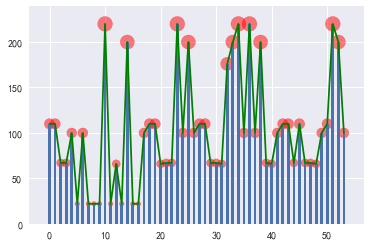

In [113]:
plt.plot(df9.index, df9.AMT, color='g')
plt.bar(df9.index, df9.AMT, width=0.5)
#plt.scatter(df9.index, df9.AMT, c='red', marker='o', alpha=0.5)
plt.scatter(df9.index, df9['AMT'], s=df9['AMT'], c='red', marker='o', alpha=0.5)  # 第三个变量表明根据收入气泡的大小
plt.show()

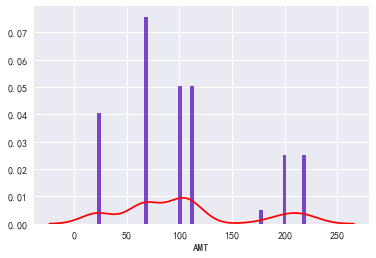

In [114]:
sns.distplot(df9.AMT, bins=54, color='red')
n, bins, patches = plt.hist(df9.AMT, bins=54, normed=1, facecolor='blue', alpha=0.5)

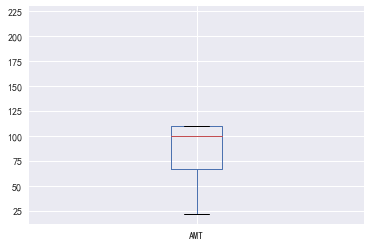

In [115]:
pd.DataFrame(df9['AMT']).boxplot()

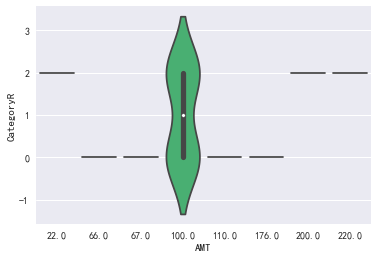

In [116]:
sns.violinplot(df9['AMT'], df9['CategoryR'])

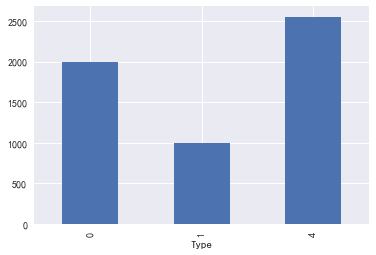

In [117]:
var = df9.groupby('Type').AMT.sum()
var.plot(kind='bar')

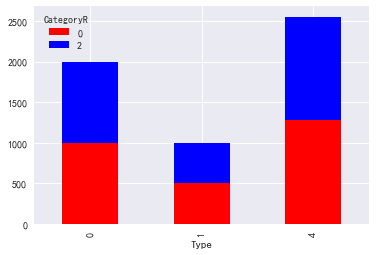

In [118]:
var = df9.groupby(['Type', 'CategoryR']).AMT.sum()
var.unstack().plot(kind='bar', stacked=True, color=['red', 'blue'])

([<matplotlib.patches.Wedge at 0x37869588>,
  <matplotlib.text.Text at 0x37866e10>])

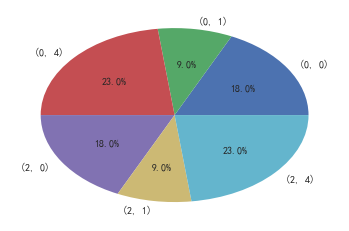

In [119]:
var = df9.groupby(['CategoryR', 'Type']).AMT.sum()
plt.pie(var, labels=var.index, autopct='%1.1f%%')

In [120]:
df9

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code,Entry,AMT
Series,,,,,,,,,,,,,,,,,,,,,
0,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,12,1,0,12,2018-05-29,110.0
1,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,10,1,0,10,2018-05-29,110.0
2,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,12,1,0,12,2018-05-29,67.0
3,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,65,1,0,69,2018-05-29,67.0
4,7689,96715,99205,TREVOR DOUGLAS,100.0,null,29-MAY-18,null,85142,20362,...,0,1,0,0,5,1,0,5,2018-05-29,100.0
5,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
6,7689,96715,99205,TREVOR DOUGLAS,100.0,null,01-JUN-18,null,85142,20362,...,0,1,0,2,14,2,0,14,2018-06-01,100.0
7,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
8,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0


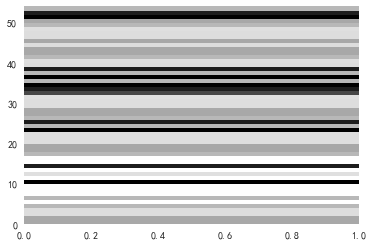

In [121]:
plt.pcolor(df9[['AMT']])

## Clustering

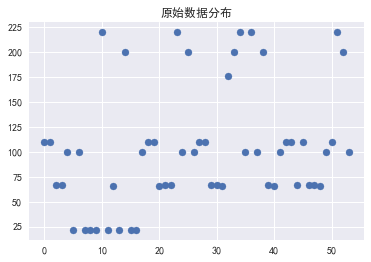

In [122]:
import sklearn.datasets as ds
import matplotlib.colors

#造数据

#原始数据分布
matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False
cm = matplotlib.colors.ListedColormap(list('rgbm'))

plt.scatter(df9.index, df9['AMT'], cmap=cm)
plt.title(u'原始数据分布')
#plt.plot(df9.index, df9.AMT, color='g')

### 1. K-Means

[2 2 0 0 2 3 2 3 3 3 1 3 0 3 1 3 3 2 2 2 0 0 0 1 2 1 2 2 2 0 0 0 1 1 1 2 1
 2 1 0 0 2 2 2 0 2 0 0 0 2 2 1 1 2]


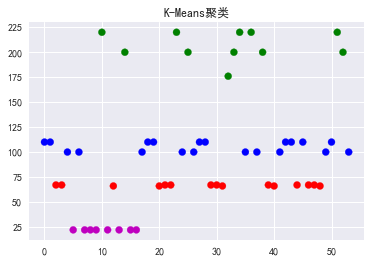

In [123]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4, init='k-means++')
y_pre = model.fit_predict(df9[['AMT']])
print(y_pre)
plt.scatter(df9.index, df9['AMT'], c=y_pre, cmap=cm)
plt.title(u'K-Means聚类')

### 2. AGNES算法(自底向上)

各个簇的样本数目：
0    23
2    20
1    11
dtype: int64


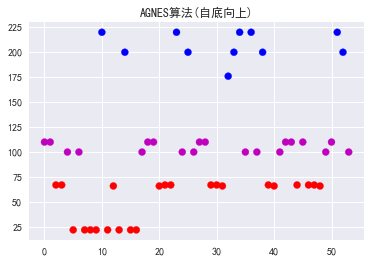

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
 
clustering = AgglomerativeClustering(linkage='ward', n_clusters=3)

data = df9[['AMT']]
res = clustering.fit(data)
 
print("各个簇的样本数目：")
print(pd.Series(clustering.labels_).value_counts())
#print("聚类结果：")
#print(confusion_matrix(iris.target, clustering.labels_))

plt.scatter(df9.index, df9['AMT'], c=clustering.labels_, cmap=cm)
plt.title('AGNES算法(自底向上)')

### 3. DBSCAN

[ 0  0  1  1  2  3  2  3  3  3  4  3  5  3  6  3  3  2  0  0  5  1  1  4
  2  6  2  0  0  1  1  5 -1  6  4  2  4  2  6  1  5  2  0  0  1  0  1  1
  5  2  0  4  6  2]


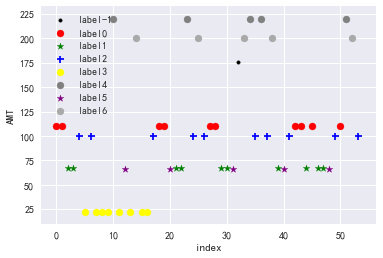

In [125]:
from sklearn.cluster import KMeans
from sklearn import datasets 
from sklearn.cluster import DBSCAN

X = df9[['AMT']]
 
dbscan = DBSCAN()
dbscan.fit(X)
label_pred = dbscan.labels_
print(label_pred)
 
# 绘制k-means结果
xm1 = X[label_pred == -1]
x0 = X[label_pred == 0]
x1 = X[label_pred == 1]
x2 = X[label_pred == 2]
x3 = X[label_pred == 3]
x4 = X[label_pred == 4]
x5 = X[label_pred == 5]
x6 = X[label_pred == 6]
plt.scatter(xm1.index, xm1['AMT'], c="black", marker='.', label='label-1')
plt.scatter(x0.index, x0['AMT'], c="red", marker='o', label='label0')
plt.scatter(x1.index, x1['AMT'], c="green", marker='*', label='label1')
plt.scatter(x2.index, x2['AMT'], c="blue", marker='+', label='label2')
plt.scatter(x3.index, x3['AMT'], c="yellow", marker='o', label='label3')
plt.scatter(x4.index, x4['AMT'], c="gray", marker='o', label='label4')
plt.scatter(x5.index, x5['AMT'], c="purple", marker='*', label='label5')
plt.scatter(x6.index, x6['AMT'], c="darkgray", marker='o', label='label6')
plt.xlabel('index')
plt.ylabel('AMT')
plt.legend(loc=2)
plt.show()

## Classification

In [126]:
#df9.drop(['SALES_MANAGER_CODE', 'PRIMARY_OWNER_NAME'], axis=1, inplace=True)
df9

,DEALER_CODE,SALES_MANAGER_CODE,INVESTMENT_SPECIALIST_CODE,PRIMARY_OWNER_NAME,CAD_EQUIVALENT,FX_RATE,ENTRY_DATE,REVERSED_DATE,PROCESSING_TRANSIT,DOMICILE_TRANSIT,...,Company,Product,OwnershipR,CategoryR,Investment,TransactionR,CurrencyR,Code,Entry,AMT
Series,,,,,,,,,,,,,,,,,,,,,
0,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,12,1,0,12,2018-05-29,110.0
1,7689,96715,99205,TREVOR DOUGLAS,110.0,null,29-MAY-18,null,85142,20362,...,0,4,1,0,10,1,0,10,2018-05-29,110.0
2,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,12,1,0,12,2018-05-29,67.0
3,7689,96715,99205,TREVOR DOUGLAS,67.0,null,29-MAY-18,null,85142,20362,...,0,0,0,0,65,1,0,69,2018-05-29,67.0
4,7689,96715,99205,TREVOR DOUGLAS,100.0,null,29-MAY-18,null,85142,20362,...,0,1,0,0,5,1,0,5,2018-05-29,100.0
5,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
6,7689,96715,99205,TREVOR DOUGLAS,100.0,null,01-JUN-18,null,85142,20362,...,0,1,0,2,14,2,0,14,2018-06-01,100.0
7,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0
8,7689,96715,99205,TREVOR DOUGLAS,22.0,null,01-JUN-18,null,85142,20362,...,0,4,1,2,16,2,0,16,2018-06-01,22.0


### 1. KNN

In [127]:
from sklearn import neighbors 

knn = neighbors.KNeighborsClassifier()  
#训练数据集  
knn.fit(df9[['Type', 'Investment', 'AMT']], df9['CategoryR'])
#训练准确率
score = knn.score(df9[['Type', 'Investment', 'AMT']], df9['CategoryR'])

#预测
predict = knn.predict([[1, 5, 100.0], [1, 14, 100.0]])
#预测，返回概率数组
predict2 = knn.predict_proba([[1, 5, 100.0], [1, 14, 100.0]])

print('Predict: ' + str(predict))
#print('Predict2: ' + str(predict2))

Predict: [0 2]


### 2. ID3

In [128]:
from sklearn.tree import DecisionTreeClassifier as DTC
dtc = DTC(criterion='entropy')                #建立决策树模型，基于信息熵
dtc.fit(df9[['Type', 'Investment', 'AMT']], df9['CategoryR'])                                  #训练模型

#导入相关函数，可视化决策树。
from sklearn.tree import export_graphviz
x = pd.DataFrame(df9[['Type', 'Investment', 'AMT']])
with open("tree.dot", 'w') as f:
    f = export_graphviz(dtc, feature_names = x.columns, out_file = f)
    
#预测
predict = dtc.predict([[1, 5, 100.0], [1, 14, 100.0]])
print('Predict: ' + str(predict)) #0, 2

Predict: [0 2]


### 3. CART

best_depth: 2
Predict: [0 2]
decision tree:
    accuracy on the training subset: 1.000
    accuracy on the test subset: 1.000
    Feature importances: [0. 1. 0.]


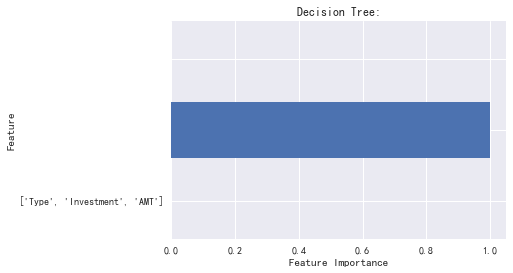

In [129]:
#import pydotplus
#from IPython.display import Image
#import graphviz
#from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#random_state 相当于随机数种子
X_train, x_test, y_train, y_test = train_test_split(
    df9[['Type', 'Investment', 'AMT']], df9['CategoryR'], random_state=42)
 
list_average_accuracy = []
depth = range(1, 30)
for i in depth:
    #max_depth = 4限制决策树深度可以降低算法复杂度，获取更精确值
    tree = DecisionTreeClassifier(max_depth=i, random_state=0, criterion='gini') #or "entropy"
    tree.fit(X_train, y_train)
    accuracy_training = tree.score(X_train, y_train)
    accuracy_test = tree.score(x_test, y_test)
    average_accuracy = (accuracy_training + accuracy_test) / 2.0
    #print("average_accuracy:", average_accuracy)
    list_average_accuracy.append(average_accuracy)
     
max_value = max(list_average_accuracy)
#索引是0开头，结果要加1
best_depth = list_average_accuracy.index(max_value) + 1
print("best_depth:", best_depth)
 
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=0)
best_tree.fit(X_train, y_train)

accuracy_training = best_tree.score(X_train, y_train)
accuracy_test = best_tree.score(x_test, y_test)

#预测
predict = best_tree.predict([[1, 5, 100.0], [1, 14, 100.0]])
print('Predict: ' + str(predict))

print("decision tree:")   
print("    accuracy on the training subset: {:.3f}".format(best_tree.score(X_train, y_train)))
print("    accuracy on the test subset: {:.3f}".format(best_tree.score(x_test, y_test)))
print('    Feature importances: {}'.format(best_tree.feature_importances_))

plt.barh(range(3), best_tree.feature_importances_, align='center')
plt.yticks(np.arange(3), [['Type', 'Investment', 'AMT']])
plt.title("Decision Tree:")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 4. 显示决策树

### 5. Random Forests

In [130]:
#! pip install bunch

In [131]:
#随机森林
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from bunch import Bunch

sco = Bunch()
sco.data, sco.target = np.array(df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
#print iris#iris的４个属性是：萼片宽度　萼片长度　花瓣宽度　花瓣长度　标签是花的种类：setosa versicolour virginica 
print(sco['target'].shape)
rf = RandomForestRegressor() #这里使用了默认的参数设置 
rf.fit(sco.data[:150], sco.target[:150]) #进行模型的训练 

#随机挑选两个预测不相同的样本 
instance = sco.data[[10, 19]] 
print(instance)
rf.predict(instance[[0]])
print('instance 0 prediction；', rf.predict(instance[[0]]))
print('instance 1 prediction；', rf.predict(instance[[1]]))
print(sco.target[10], sco.target[19]) 

(54,)
[[  4.  16. 220.]
 [  4.  10. 110.]]
instance 0 prediction； [2.]
instance 1 prediction； [0.]
2 0


In [132]:
from sklearn.ensemble import RandomForestClassifier

sco.data, sco.target = np.array(df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
sco.feature_names = ['Type', 'Investment', 'AMT']
sco.target_names = ['CategoryR']
print(sco.feature_names)
df_tmp = pd.DataFrame(sco.data, columns=sco.feature_names)
df_tmp['is_train'] = np.random.uniform(0, 1, len(df_tmp)) <= .75
df_tmp['CategoryR'] = df9['CategoryR'] # pd.Categorical.from_codes(sco.target, sco.target_names)
print(df_tmp.tail())

train, test = df_tmp[df_tmp['is_train']==True], df_tmp[df_tmp['is_train']==False]

features = df_tmp.columns[:3]
clf = RandomForestClassifier(n_jobs=2)
#y, _ = pd.factorize(train['CategoryR'])
y = train['CategoryR']
#print(train[features].tail())
#print(y)
clf.fit(train[features], y)

preds = clf.predict(test[features])
print('real: ' , test['CategoryR'].values)
print('pred: ' , preds)

pd.crosstab(test['CategoryR'], preds, rownames=['actual'], colnames=['preds'])

['Type', 'Investment', 'AMT']
    Type  Investment    AMT  is_train  CategoryR
49   1.0         5.0  100.0      True          0
50   4.0        12.0  110.0      True          0
51   4.0        16.0  220.0      True          2
52   0.0        15.0  200.0      True          2
53   1.0        14.0  100.0      True          2
real:  [2 2 0 0 2 2 2 2 2 2 0]
pred:  [2 2 0 0 2 2 2 2 2 2 0]


preds,0,2
actual,,
0,3,0
2,0,8


### 6. 3种方法的比较

In [133]:
#random forest test
from sklearn.model_selection import cross_val_score
#from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
X, y = np.array(df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
 
clf = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
 
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())    
 
clf = ExtraTreesClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
scores = cross_val_score(clf, X, y)
print(scores.mean())

1.0
1.0
1.0


In [134]:
#实现特征选择
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
import numpy as np 
 
from sklearn.model_selection import cross_val_score, ShuffleSplit 
X, Y = np.array(df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
names = ['Type', 'Investment', 'AMT']
rf = RandomForestRegressor() 
scores = [] 
for i in range(X.shape[1]): 
    score = cross_val_score(rf, X[:, i:i+1], Y, scoring="r2", cv=ShuffleSplit(len(X), 3, .3)) 
    scores.append((round(np.mean(score), 3), names[i])) 
print(sorted(scores, reverse=True))

[(0.894, 'Investment'), (0.311, 'AMT'), (-0.246, 'Type')]


32
Nearest Neighbors 1.0
Linear SVM 0.5909090909090909
RBF SVM 0.9090909090909091
Decision Tree 1.0
Random Forest 1.0
AdaBoost 1.0
Naive Bayes 1.0
LDA 0.5
QDA 1.0


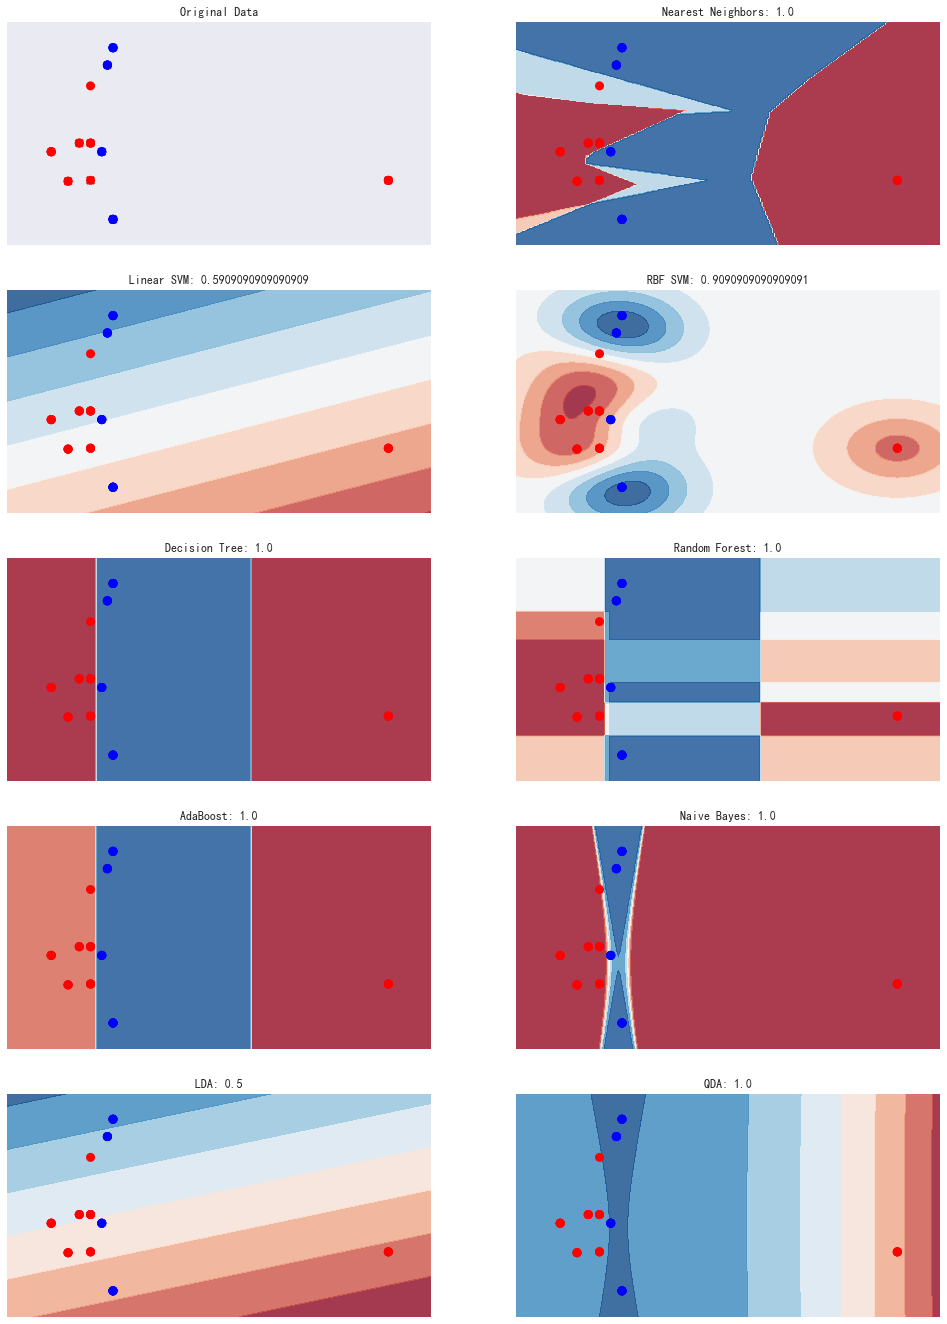

In [135]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.lda import LDA
from sklearn.qda import QDA

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Decision Tree",
         "Random Forest", "AdaBoost", "Naive Bayes", "LDA", "QDA"]
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    LDA(),
    QDA()]

figure = plt.figure(figsize=(27, 18))
i = 1

# preprocess dataset, split into training and test part
X, y = np.array(df9[['Investment', 'AMT']]), np.array(df9['CategoryR'])
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
print(len(X_train[:, 0]))

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
#ax = plt.subplot(len(X), len(classifiers) + 1, i)
ax = plt.subplot(5, 2, 1)
# Plot the training points
ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', linewidth=2, c=y_train, cmap=cm_bright)
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], marker='x', linewidth=2, c=y_test, cmap=cm_bright, alpha=0.6)
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xticks(())
ax.set_yticks(())
ax.set_title('Original Data')
i = 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(5, 2, i+1)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', linewidth=2, c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], marker='o', linewidth=2, c=y_test, cmap=cm_bright, alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(name + ': ' + str(score))
    #ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
    #        size=15, horizontalalignment='right')
    print(name, score)
    i += 1

figure.subplots_adjust(left=.01, right=0.49)
figure.subplots_adjust(top=1.0, bottom=.001)

#plt.show()

### 7. Linear Regression

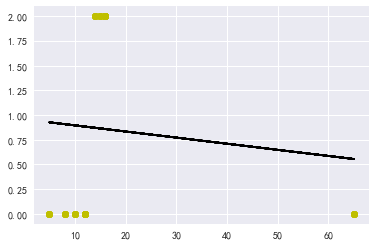

In [136]:
import numpy as np
import matplotlib.pyplot as plt

X, Y = (df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
names = ['Type', 'Investment', 'AMT']

fit = np.polyfit(X['Investment'], Y, 1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(X['Investment'], Y, 'yo', X['Investment'], fit_fn(X['Investment']), '--k')

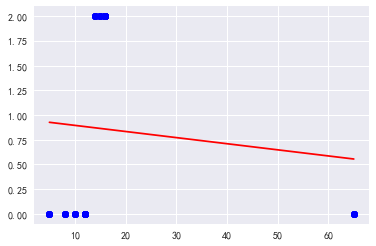

In [137]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

x, y = (df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
names = ['Type', 'Investment', 'AMT']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x['Investment'], y)
mn = np.min(x['Investment'])
mx = np.max(x['Investment'])
x1 = np.linspace(mn, mx, 500)
y1 = gradient * x1 + intercept
plt.plot(x['Investment'], y, 'ob')
plt.plot(x1, y1, '-r')
plt.show()

### 8. Non-LinearRegression

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: overflow encountered in longlong_scalars
C:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


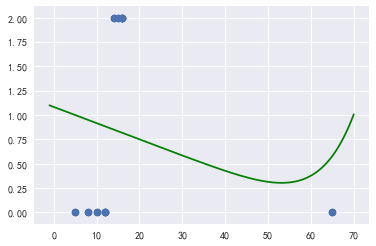

In [138]:
# coding = utf-8
 
'''
作者:Xiaole Wen
程序:多项式曲线拟合算法
'''
import matplotlib.pyplot as plt
import math
import numpy
import random
 
fig = plt.figure()
ax = fig.add_subplot(111)
 
#在这里给出拟合多项式的阶数
order = 9
 
#生成曲线上的各个点
x, y = (df9['Investment']), np.array(df9['CategoryR'])
names = ['Type', 'Investment', 'AMT']

#ax.plot(x, y, color = 'r', linestyle = '-', marker = '')
#, label = "(a*a-1)*(a*a-1)*(a*a-1)+0.5"
plt.scatter(x, y) #生成的曲线上的各个点偏移一下，并放入到xa, ya中去

#存储从0次到m次的所有冥方和
bigMat = []
for j in range(0, 2 * order + 1):
    sum = 0
    for i in range(0, len(x)):
        sum += (x[i] ** j)
    bigMat.append(sum)

#计算线性方程组系数矩阵
matA = []
for rowNum in range(0, order + 1):
    row = bigMat[rowNum:rowNum + order + 1]
    matA.append(row)

matA = numpy.array(matA)
 
matB = []
for i in range(0, order + 1):
    ty = 0.0
    for k in range(0, len(x)):
        ty += y[k] * (x[k]**i)
    matB.append(ty)

matB = numpy.array(matB)

matAA = numpy.linalg.solve(matA, matB)
 
#画出拟合后的曲线
#print(matAA)
xxa =  numpy.arange(-1, 70, 0.01)
yya = []
for i in range(0, len(xxa)):
    yy = 0.0
    for j in range(0, order + 1):
        dy = (xxa[i]**j)
        dy *= matAA[j]
        yy += dy
    yya.append(yy)
ax.plot(xxa, yya, color = 'g', linestyle = '-', marker = '')
 
ax.legend()
plt.show()

### 9. 岭回归（Ridge Regression）    ???预测    不是分类

In [139]:
# 岭回归（Ridge 回归）
from sklearn import linear_model
X, y = (df9[['Type', 'Investment', 'AMT']]), np.array(df9['CategoryR'])
names = ['Type', 'Investment', 'AMT']
clf = linear_model.Ridge(alpha=0.1)  # 设置k值
clf.fit(X, y)  # 参数拟合
print('coef_: ', clf.coef_)  # 系数
print('intercept_: ', clf.intercept_)  # 常量
#print(clf.predict([[3, 3]]))  # 求预测值
#预测
predict = clf.predict([[1, 5, 100.0], [1, 14, 100.0]])
print('Predict: ' + str(predict)) #0, 2

print(clf.decision_function(X))  # 求预测，等同predict
print(clf.score(X, y))  # R^2，拟合优度
print(clf.get_params())  # 获取参数信息
print(clf.set_params(fit_intercept=False))  # 重新设置参数

coef_:  [ 0.12015019 -0.00025023  0.00404475]
intercept_:  0.20442710683564025
Predict: [0.72780163 0.72554956]
[1.12694814 1.1274486  0.47242292 0.45916075 0.72780163 0.7700088
 0.72554956 0.7700088  0.7700088  0.7700088  1.57087024 0.7700088
 0.46937908 0.7700088  1.00962461 0.7700088  0.7700088  0.72780163
 1.12694814 1.1274486  0.46937908 0.47242292 0.45916075 1.57087024
 0.72554956 1.00962461 0.72780163 1.1274486  1.12694814 0.45916075
 0.47242292 0.46937908 1.39390195 1.00962461 1.57087024 0.72554956
 1.57087024 0.72554956 1.00962461 0.45916075 0.46937908 0.72780163
 1.12694814 1.1274486  0.47242292 1.1274486  0.47242292 0.45916075
 0.46937908 0.72780163 1.12694814 1.57087024 1.00962461 0.72554956]
0.11733156792583466
{'alpha': 0.1, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Ridge(alpha=0.1, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', 

C:\Program Files\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function decision_function is deprecated;  and will be removed in 0.19.
  warnings.warn(msg, category=DeprecationWarning)
